In [1]:
# import libraries
import numpy as np
import sys
import psi4
from helper_PFCI import PFHamiltonianGenerator
np.set_printoptions(threshold=sys.maxsize)
#psi4.core.set_output_file('output.dat', False)
import time
from scipy.optimize import curve_fit
from scipy import interpolate
from matplotlib import pyplot as plt
from numpy.polynomial import Chebyshev
from scipy import constants
from numpy.polynomial import Polynomial

In [2]:
# setup basic arguments for qed-ci calculation

# z-matrix for H2
mol_str_H2 = """
H
H 1 0.74
symmetry c1
"""

# options for Psi4
options_dict = {
    #"energy": "CCSD",
    "basis": "6-311G**",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

# options for the PFHamiltonian Generator class - include cavity effects
cavity_dict = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.05]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 1, #<== this is a minimal photon basis, should explore increasing this 
}

# options for PFHamiltonian Generator class - exclude cavity effects
cavity_free_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0.0]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 0, 
}



In [3]:
mol_tmpl = """
H
H 1 **R**
symmetry c1
"""
options_dict = {
    "basis": "cc-pVQZ",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    'num_roots' : 2
}
r_data = np.linspace(0.6, 0.9, 50)
psi4.set_options(options_dict)
fci_S0 = []
fci_S1 = []
for r in r_data:
    mol_str = mol_tmpl.replace("**R**", str(r))
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    fci_S0.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    fci_S1.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Nov 30 15:43:45 2023

   => Loading Basis Set <=

    Name: CC-PVQZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2 entry H          line    22 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/cc-pvqz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: D_inf_h

    Geometry (in Angstrom), 

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ----------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             24
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  60 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                       

In [8]:
mol_tmpl_e = """
H
H 1 **R**
symmetry c1
"""

r_data_e = np.linspace(0.6, 1.85, 50)
psi4.set_options(options_dict)
fci_S0_e = []
fci_S1_e = []
for r in r_data_e:
    mol_str_e = mol_tmpl.replace("**R**", str(r))
    mol_e = psi4.geometry(mol_str_e)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    fci_S0_e.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    fci_S1_e.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Nov 30 15:45:57 2023

   => Loading Basis Set <=

    Name: 6-311G**
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2 entry H          line    32 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/6-311gss.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: D_inf_h

    Geometry (in Angstrom)

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-08      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               8
      Number of SO shells:               8
      Number of primitives:             12
      Number of atomic orbitals:        12
      Number of basis functions:        12

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 1119 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        2      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-08      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I

In [5]:
# z-matrix for H2
mol_str_H2 = """
H
H 1 0.74
symmetry c1
"""

# options dictionary for the psi4 calculation
options_dict0 = {'basis': '6-311G**',
               'save_jk': True, 
               'scf_type': 'pk',
               'e_convergence' : 1e-8,
               'd_convergence' : 1e-7
               }

# let's run a psi4 geometry optimization to get the optimal geometry

# set the options
psi4.set_options(options_dict0)

# first set the coordinates in init_string as the molecule's geometry 
mol0_H2 = psi4.geometry(mol_str_H2)

# now capture the psi4 geometry data with the guess coordinates
init_geometry_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol0_H2)

# run the geometry optimization
psi4.optimize("fci")

guess_geometry_H2 = mol0_H2.geometry()
print(guess_geometry_H2)

guess_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol0_H2)



Scratch directory: /tmp/

         ----------------------------------------------------------
                                   FINDIF
                     R. A. King and Jonathon Misiewicz
         ----------------------------------------------------------

  Using finite-differences of energies to determine gradients.
    Generating geometries for use with 3-point formula.
    Displacement size will be 5.00e-03.
    Number of atoms is 2.
    Number of symmetric SALCs is 1.
    Translations projected? 1. Rotations projected? 1.
    Number of geometries (including reference) is 3.
 3 displacements needed ...

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //    FiniteDifference Computations  //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.

    atoms 1-2 entry H          line    32 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/6-311gss.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: D_inf_h

    Geometry (in Bohr), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----------------
         H            0.000000000000     0.000000000000    -0.698875101544     1.007825032230
         H            0.000000000000     0.000000000000     0.698875101544     1.00782

In [6]:
# options dictionary for the psi4 calculation
options_dict = {'basis': '6-311G**',
               'save_jk': True, 
               'scf_type': 'pk',
               'e_convergence' : 1e-8,
               'd_convergence' : 1e-7
               }

# set the options
psi4.set_options(options_dict)

# first set the coordinates in guess_string as the molecule's geometry 
mol_H2 = psi4.geometry(mol_str_H2)

# now capture the psi4 geometry data with the guess coordinates
guess_geometry_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol_H2)

# run the geometry optimization
psi4.optimize("fci")

opt_geometry = mol_H2.geometry()

# capture the psi4 geometry data from the optimization
opt_geometry_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol_H2)

# run excited-state calculations - get first 5 excited states
n_states = 5

# run psi4 TDSCF at same level of theory as geometry optimization
psi4_rhf_e, wfn_H2 = psi4.frequency("fci/6-311G**", return_wfn=True, molecule=mol_H2,maxiter=50)




Scratch directory: /tmp/

         ----------------------------------------------------------
                                   FINDIF
                     R. A. King and Jonathon Misiewicz
         ----------------------------------------------------------

  Using finite-differences of energies to determine gradients.
    Generating geometries for use with 3-point formula.
    Displacement size will be 5.00e-03.
    Number of atoms is 2.
    Number of symmetric SALCs is 1.
    Translations projected? 1. Rotations projected? 1.
    Number of geometries (including reference) is 3.
 3 displacements needed ...

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //    FiniteDifference Computations  //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.

              'E_CONVERGENCE': 1e-08,
              'NUM_ROOTS': 2,
              'PARENT_SYMMETRY': 'C1',
              'SAVE_JK': 1,
              'SCF_TYPE': 'PK',
              'SCF__INTS_TOLERANCE': 1e-12,
              'function_kwargs': {'write_orbitals': False}},
 'model': {'basis': '6-311g**', 'method': 'fci'},
 'molecule': {'atom_labels': ['', ''],
              'atomic_numbers': [1, 1],
              'fix_com': True,
              'fix_orientation': True,
              'fix_symmetry': 'c1',
              'fragment_charges': [0.0],
              'fragment_multiplicities': [1],
              'fragments': [[0, 1]],
              'geometry': [0.0, -0.00352178172855016, -0.7023968832725492, 0.0, 0.003521781728550162,
                           0.7023968832725492],
              'mass_numbers': [1, 1],
              'masses': [1.00782503223, 1.00782503223],
              'molecular_charge': 0.0,
              'molecular_multiplicity': 1,
              'name': 'H2',
              '


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.

    MAX NUM VECS   =       50      REF SYM       =     AUTO
    IOPEN        =       NO

    EX ALLOW       =  1  1 
    STATE AVERAGE  =  0(1.00) 

   ==> CI Orbital and Space information <==

   ------------------------------------
               Space    Total     A
   ------------------------------------
                 Nso       12    12
                 Nmo       12    12
               Ndocc        1     1
               Nsocc        0     0
   ------------------------------------
              CI Spaces
   ------------------------------------
        Dropped DOCC        0     0
              Active       12    12
        Dropped UOCC        0     0
   ------------------------------------

   ==> Setting up CI strings <==

    There are 12 alpha and 12 beta strings
    The CI space requires 144 (1.44E+02) determinants and 1 blocks

   ==> Transforming CI integrals <==

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen 

  Correction Cp             0.000 [cal/(mol K)]        0.000 [J/(mol K)]       0.00000000 [mEh/K]

  ==> Thermochemistry Energy Analysis <==

  Raw electronic energy, E0
  Total E0, Electronic energy at well bottom at 0 [K]                   -1.16834033 [Eh]

  Zero-point energy, ZPE_vib = Sum_i nu_i / 2
    Electronic ZPE          0.000 [kcal/mol]        0.000 [kJ/mol]       0.00000000 [Eh]
    Translational ZPE       0.000 [kcal/mol]        0.000 [kJ/mol]       0.00000000 [Eh]
    Rotational ZPE          0.000 [kcal/mol]        0.000 [kJ/mol]       0.00000000 [Eh]
    Vibrational ZPE         6.321 [kcal/mol]       26.449 [kJ/mol]       0.01007377 [Eh]        2210.938 [cm^-1]
  Correction ZPE            6.321 [kcal/mol]       26.449 [kJ/mol]       0.01007377 [Eh]        2210.938 [cm^-1]
  Total ZPE, Electronic energy at 0 [K]                                 -1.15826656 [Eh]

  Thermal Energy, E (includes ZPE)
    Electronic E            0.000 [kcal/mol]        0.000 [kJ/mol]       0.0

## Calculation of k
Fit ground state PES of H2 to a quintic polynomial

Calculated value of k is very close to literature value (~$575 N/m$), so I am now conficent that the issue is in $ x_0 $

Min on S0 is 0.7408163265306122
Min on S1 is 1.2632653061224488
578.6460920746534


<function matplotlib.pyplot.show(close=None, block=None)>

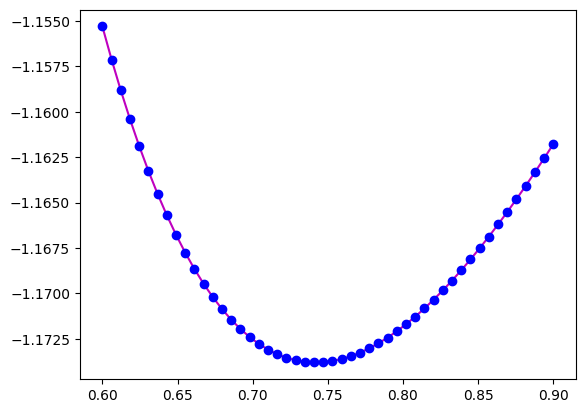

In [31]:
# Constants and Variables
au_to_SI = (4.35974 * 10 ** (-18)) * 10 ** 20
min_S0_loc = np.argmin(fci_S0[:])
min_S1_loc = np.argmin(fci_S1_e[:])
r_eq_ang = r_data[min_S0_loc]
print(f'Min on S0 is {r_data[min_S0_loc]}')
print(f'Min on S1 is {r_data_e[min_S1_loc]}')

# Fitting S0 PES to a quintic polynomial
poly = np.poly1d(np.polyfit(r_data, fci_S0, 5))

#Taking first and second derivative of S0 PES and evaluating at r_eq
first_derivative = poly.deriv()
second_derivative = first_derivative.deriv()
k_test_au = second_derivative(r_eq_ang)
k_test_SI = k_test_au * au_to_SI
print(k_test_SI)

#plotting S0 PES and quintic fit
plt.plot(r_data, poly(r_data), 'm-', label='fit')
plt.plot(r_data, fci_S0[:], 'bo', label='cavity free |g>')
plt.show

## Calculation of $ \text{x}_0 $

$$ \frac{\hbar}{2}\sqrt{\frac{k}{\mu}} = \frac{k}{2}(x_0 - x_{eq})^2  $$

Expanded, solved for $ x_o $, and found zeros using quadratic formula

In [32]:
mu_amu = 1.007 / 2
mu_kg = mu_amu * 10 ** (-3) / (6.022 * 10 ** 23) 
r_eq_SI = r_eq_ang * 10 ** (-10)
h_bar = constants.hbar
left = (h_bar / 2) * np.sqrt(k_test_SI / mu_kg)
a = 0.5 * k_test_SI 
b = -k_test_SI * r_eq_SI
c = 0.5 * k_test_SI * (r_eq_SI ** 2) - left
zeros_n = (-b - np.sqrt((b ** 2) - 4 * a * c)) / (2 * a)
zeros_p = (-b + np.sqrt((b ** 2) - 4 * a * c)) / (2 * a)
x0_angstrom = zeros_n * 10 ** 10
x0_au = x0_angstrom / psi4.constants.bohr2angstroms
print(x0_au)

1.167254632479461


## Calculation of the Huang-Rhys Factor
Huang Rhys factor can be calculated by both

$$ S = 1/2(\Delta x / x_0)^2 \tag{Turner}$$

from the mode anharmonicity paper

and 

$$ S = \frac{m\omega_{vib} \Delta x^2}{2 \hbar} \tag{Hsu}$$

from the polaritonic Huang-Rhys factor paper

In [43]:
# Constants and Variables
x_0 = wfn_H2.frequency_analysis["Xtp0"].data[5] 
delta_au = (r_data_e[min_S1_loc] - r_data[min_S0_loc]) / psi4.constants.bohr2angstroms
delta_m = (r_data_e[min_S1_loc] - r_data[min_S0_loc]) * 10 ** (-10)
omega_vib = np.sqrt(k_test_SI / mu_kg)
h_bar = constants.hbar

# Turner
S_Turner = 0.5 * (delta_au / x0_au) ** 2

# Hsu
S_Hsu = mu_kg * omega_vib * delta_m ** 2 / (2 * h_bar)

print(S_Turner)
print(S_Hsu)

0.357704412103947
9.001553932721512


First plot the ground-state potential energy surfaces for $ \text{H}_2 $ inside and outisde the cavity.  The effect of the cavity will raise the energy slightly.

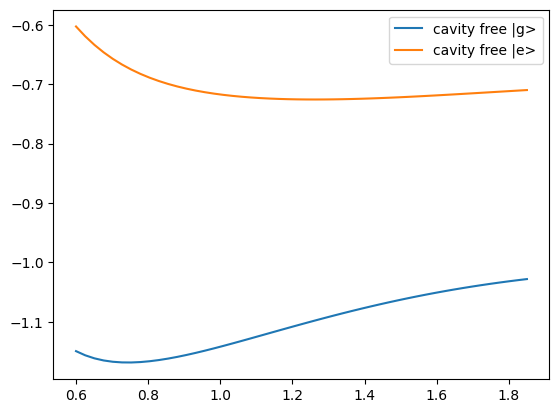

In [17]:
plt.plot(r_data_e, fci_S0_e, label='cavity free |g>')
plt.plot(r_data_e, fci_S1_e, label='cavity free |e>')
#plt.plot(r_array, cavity_free_E_array_LiH[:,1], 'b-', label='cavity free LiH |e>')
#plt.plot(r_array, V_fit, label='fit')
plt.legend()
plt.show()